In [1]:
# Download training set
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5
# Download validation set
!gdown --id 1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U

Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: /content/horse-or-human.zip
100% 150M/150M [00:02<00:00, 51.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U
To: /content/validation-horse-or-human.zip
100% 11.5M/11.5M [00:00<00:00, 138MB/s]


In [2]:
import zipfile

# Unzip training set
zip_ref = zipfile.ZipFile('./horse-or-human.zip', 'r')
zip_ref.extractall('./train-horse-or-human')
# Unzip validation set
zip_ref = zipfile.ZipFile('./validation-horse-or-human.zip', 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [3]:
import os

# Directory with training horse images
train_horse_dir = os.path.join('./train-horse-or-human/horses')
# Directory with training human images
train_human_dir = os.path.join('./train-horse-or-human/humans')
# Directory with validation horse images
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')
# Directory with validation human images
validation_human_dir = os.path.join('./validation-horse-or-human/horses')

In [4]:
# Print some horses training filenames
print(os.listdir(train_horse_dir)[:10])
# Print some human training filenames
print(os.listdir(train_human_dir)[:10])

['horse50-8.png', 'horse27-3.png', 'horse14-8.png', 'horse05-7.png', 'horse38-0.png', 'horse25-6.png', 'horse22-7.png', 'horse14-9.png', 'horse26-2.png', 'horse31-3.png']
['human08-02.png', 'human10-00.png', 'human04-06.png', 'human12-19.png', 'human05-25.png', 'human14-30.png', 'human08-20.png', 'human09-17.png', 'human16-08.png', 'human05-09.png']


In [5]:
# Check the number of images in each directory
print(f'Total horse training images: {len(os.listdir(train_horse_dir))}')
print(f'Total human training images: {len(os.listdir(train_human_dir))}')
print(f'Total horse validation images: {len(os.listdir(validation_horse_dir))}')
print(f'Total human validation images: {len(os.listdir(validation_human_dir))}')

Total horse training images: 500
Total human training images: 527
Total horse validation images: 128
Total human validation images: 128


In [6]:
import tensorflow as tf

# Build the model
model = tf.keras.Sequential([
          # First convolution layer
          tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
          tf.keras.layers.MaxPooling2D(2,2),
          # Second convolution layer
          tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          # Third convolution layer
          tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          # Fourth convolution layer
          tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          # Fifth convolution layer
          tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),

          # Flatten the result to feed into DNN
          tf.keras.layers.Flatten(),
          # Hidden layer of DNN
          tf.keras.layers.Dense(512, activation='relu'),
          # Output layer of DNN
          tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [8]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Instantiate data generators
train_datagen = ImageDataGenerator(rescale=1./255)          # Normalize the images
validation_datagen = ImageDataGenerator(rescale=1./255)     # Normalize the images

# Flow training image with batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    './train-horse-or-human/',
    batch_size=128,
    target_size=(300, 300),
    class_mode='binary'
)

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    './validation-horse-or-human/',
    batch_size=32,
    target_size=(300, 300),
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [10]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8
)

Epoch 1/15
8/8 [==============================] - 22s 1s/step - loss: 0.8655 - accuracy: 0.4616 - val_loss: 0.6401 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 10s 1s/step - loss: 0.6897 - accuracy: 0.6270 - val_loss: 2.1542 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 10s 1s/step - loss: 0.6498 - accuracy: 0.7219 - val_loss: 0.8428 - val_accuracy: 0.7461
Epoch 4/15
8/8 [==============================] - 9s 1s/step - loss: 0.5053 - accuracy: 0.8584 - val_loss: 0.6763 - val_accuracy: 0.8047
Epoch 5/15
8/8 [==============================] - 9s 1s/step - loss: 0.2029 - accuracy: 0.9210 - val_loss: 1.9353 - val_accuracy: 0.7266
Epoch 6/15
8/8 [==============================] - 8s 1s/step - loss: 0.1412 - accuracy: 0.9444 - val_loss: 1.7965 - val_accuracy: 0.7383
Epoch 7/15
8/8 [==============================] - 8s 1s/step - loss: 0.0930 - accuracy: 0.9611 - val_loss: 3.7585 - val_accuracy: 0.7266
Epoch 8/15
8/8 [======================

# Now you can test the model with unseen images

In [11]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

In [12]:
# Upload the images
uploaded = files.upload()

Saving horse.jpg to horse.jpg


In [13]:
for fn in uploaded.keys():

  # Load the image into computable format
  img = image.load_img(fn, target_size=(300, 300))      # Load into PIL image format
  x = image.img_to_array(img)                           # Convert PIL to an array
  x = x / 255.0                                         # Normalize the image
  x = np.expand_dims(x, axis=0)

  # Put the processed image on top of the images stack
  images = np.vstack([x])                               

  # Make prediction
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  print(fn + ' is a human' if classes[0] > 0.5 else fn + ' is a horse')

[1.202032e-15]
horse.jpg is a horse


# You can see how an image is transformed through each layer below:

In [14]:
from keras.preprocessing.image import img_to_array, load_img
import random

# Define a model that takes an image as an input, and output representations for all layers (except layer 1)
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

In [15]:
# Get a random input image from training set to visualize the transformation
horse_img_files = [os.path.join(train_horse_dir, f) for f in os.listdir(train_horse_dir)]
human_img_files = [os.path.join(train_human_dir, f) for f in os.listdir(train_human_dir)]
img_path = random.choice(horse_img_files + human_img_files)     # Merge images of 2 classes and pick a random 1

In [18]:
# Load the random picked image
img = load_img(img_path, target_size=(300, 300))      # Load into a PIL image
x = img_to_array(img)                                 # Convert PIL image to numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)                        # Numpy array with shape (1, 300, 300, 3)

# Normalize the pixel values
x = x / 255.0

In [19]:
# Feed the image through the model, obtain all intermediate representations for this image
successive_feature_maps = visualization_model.predict(x)

In [20]:
# Get the layers name
layer_names = [layer.name for layer in model.layers[1:]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


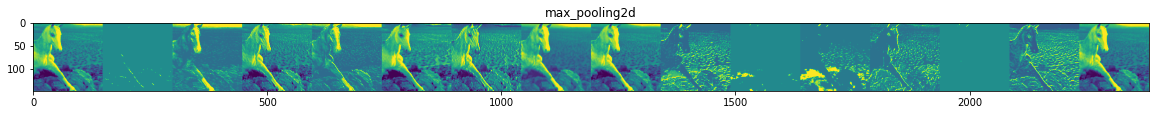

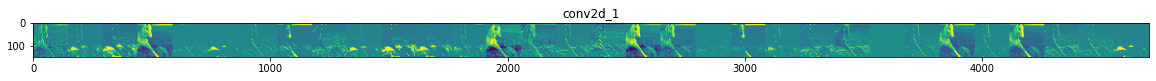

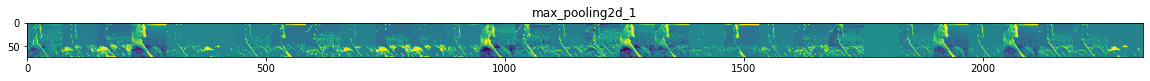

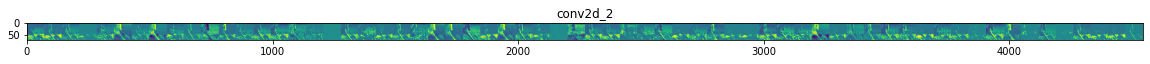

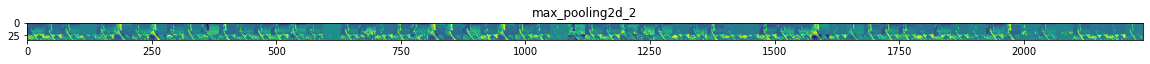

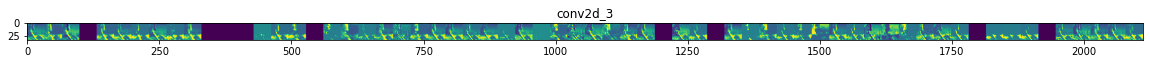

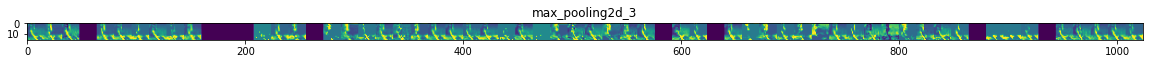

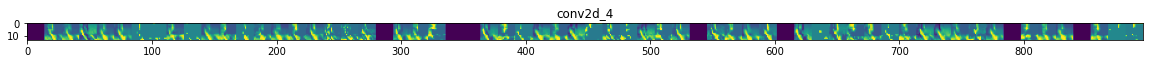

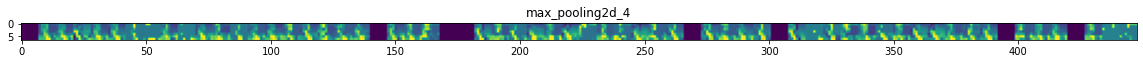

In [22]:
import matplotlib.pyplot as plt

# Dislay the intermediate representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')